# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [8]:
# Extract all rows of data
table = soup.find('table')       # Locate the table in the HTML
rows = table.find_all('tr')      # Extract all rows

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
rows_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    rows_data.append(row_data)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_data_df = pd.DataFrame(rows_data, columns=columns)

In [11]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
mars_data_df['id'] = pd.to_numeric(mars_data_df['id'], errors='coerce').astype('Int64')
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'], errors='coerce')
mars_data_df['sol'] = pd.to_numeric(mars_data_df['sol'], errors='coerce').astype('Int64')
mars_data_df['ls'] = pd.to_numeric(mars_data_df['ls'], errors='coerce').astype('Int64')
mars_data_df['month'] = pd.to_numeric(mars_data_df['month'], errors='coerce').astype('Int64')
mars_data_df['min_temp'] = pd.to_numeric(mars_data_df['min_temp'], errors='coerce')
mars_data_df['pressure'] = pd.to_numeric(mars_data_df['pressure'], errors='coerce')


In [15]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                           Int64
terrestrial_date    datetime64[ns]
sol                          Int64
ls                           Int64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_months = mars_data_df['month'].nunique()
mars_months

12

In [17]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_data_df['sol'].count()
total_sols

1867

In [18]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

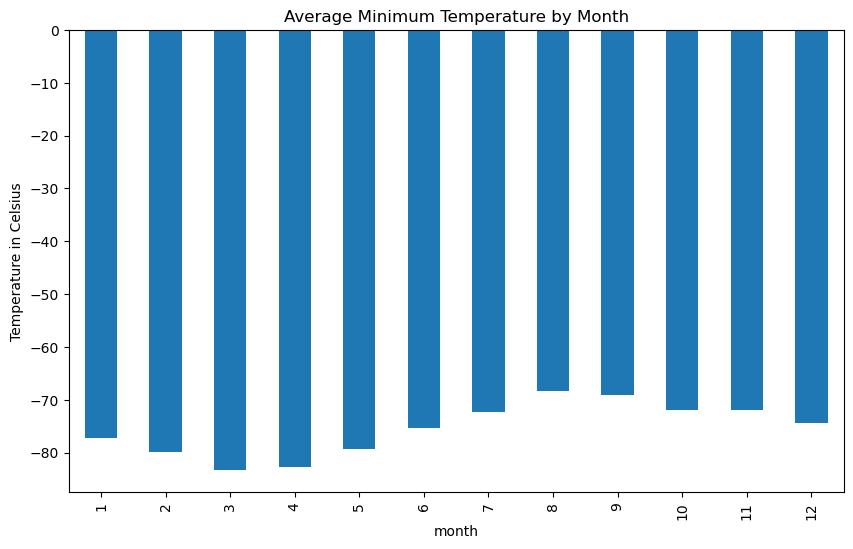

In [19]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6))

# Add title and labels to the plot
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Display the plot
plt.show()

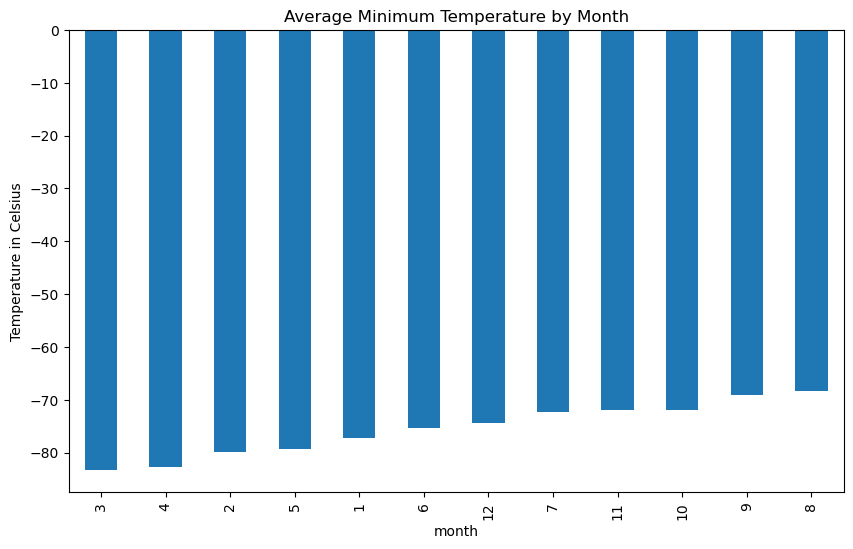

In [21]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_min_temp_by_month.sort_values()

# Plotting the sorted average minimum temperature by month
sorted_avg_temp.plot(kind='bar', figsize=(10, 6))

# Add title and labels to the plot
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Display the plot
plt.show()

In [22]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

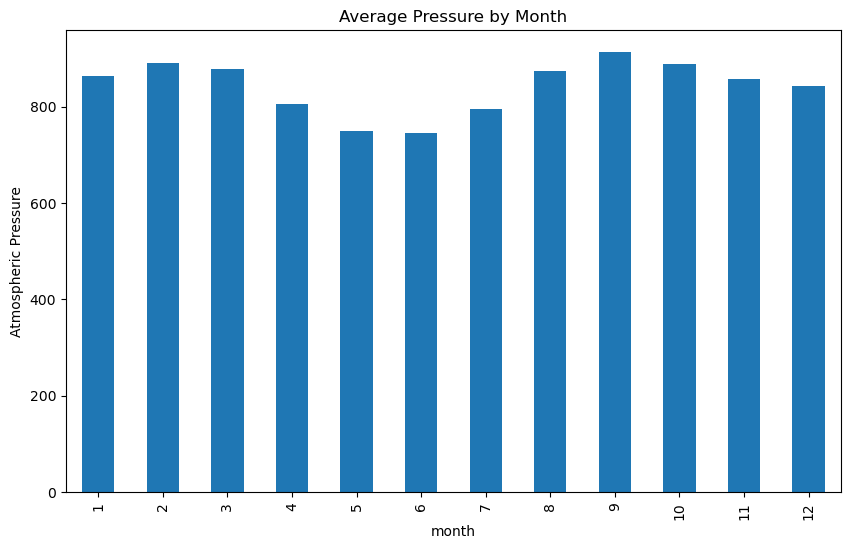

In [23]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

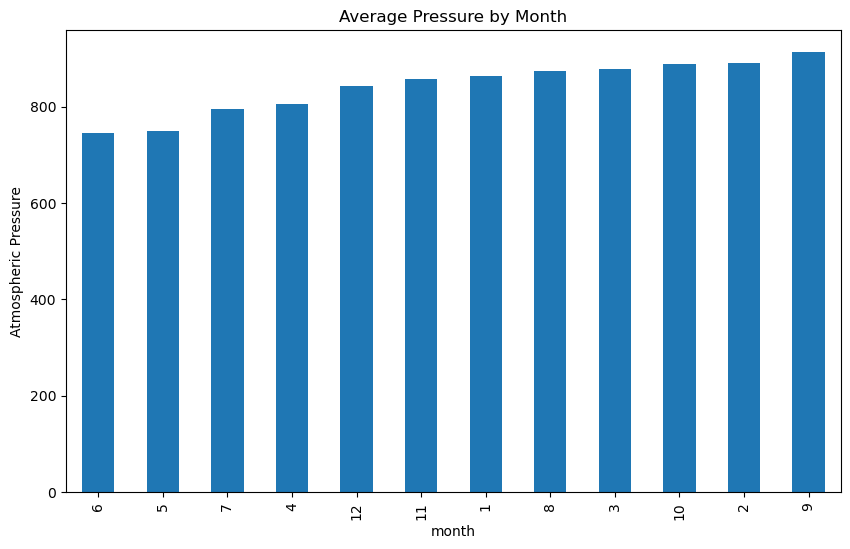

In [24]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_by_month.sort_values()
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.show()

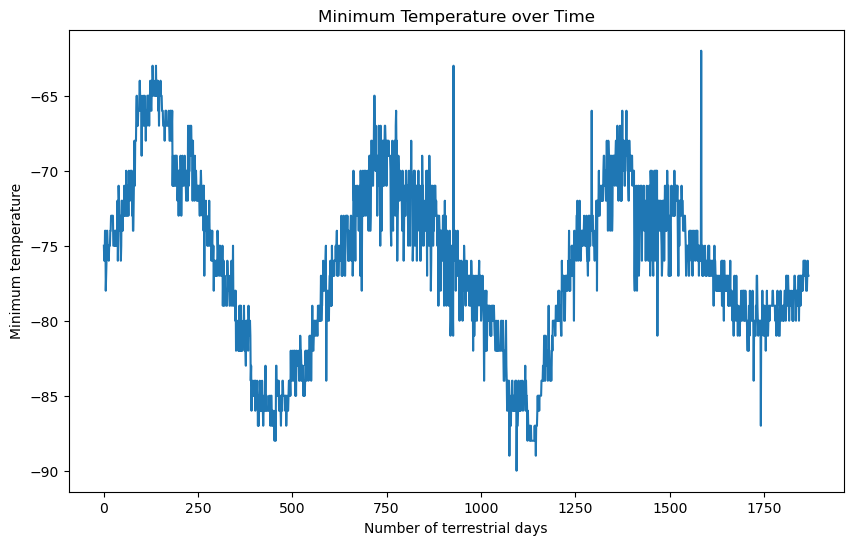

In [27]:
# How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))
plt.plot(mars_data_df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

The average minimum temperature varies significantly across the Martian year, with the coldest months being around month 3, where temperatures drop to around -83°C, and the warmest around month 8, with temperatures rising to approximately -68°C. This indicates distinct seasonal changes on Mars, with colder periods potentially linked to reduced solar energy.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

The atmospheric pressure shows its highest values around month 9 (~913 Pa), suggesting denser atmospheric conditions during this period. The lowest pressure occurs around month 6 (~745 Pa), potentially corresponding to seasonal or atmospheric dynamics unique to Mars, such as global dust storms.

#### Year Length

YOUR ANALYSIS HERE

The Martian year is approximately 687 terrestrial days, as evidenced by the repeated patterns in the minimum temperature data. This periodic cycle aligns with Mars’ orbit around the Sun and provides insights into the planet’s climatic conditions over its year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
# Write the data to a CSV
mars_data_df.to_csv('mars_weather_data.csv', index=False)

In [22]:
browser.quit()